In [1]:
_file = 'C:\\Users\\lenna\\PycharmProjects\\Bio//List_of_13f_securities//2020q1.pdf'

In [183]:
%%capture
import pdfplumber
with pdfplumber.open(_file) as pdf:
    num_pages = pdf.pages.__len__()
    first_page = pdf.pages[2]
    print(first_page.chars)

    

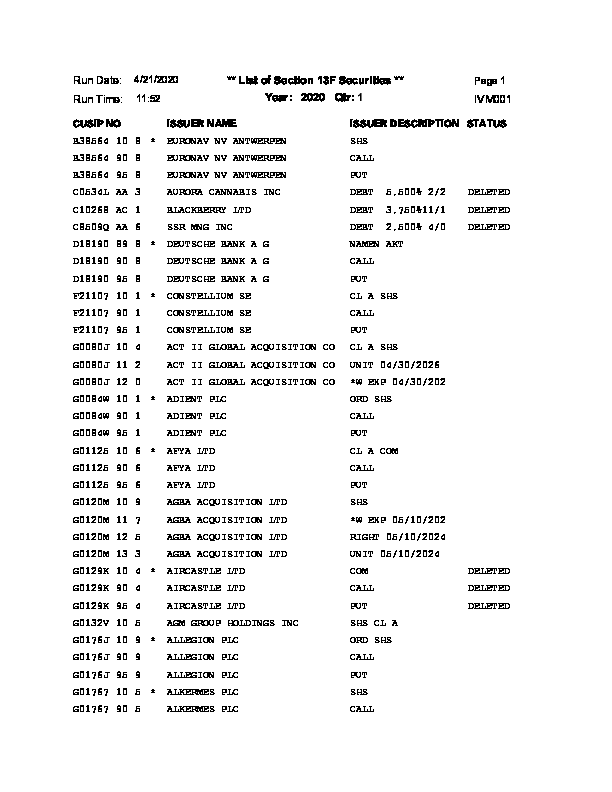

In [184]:
im = first_page.to_image()
im

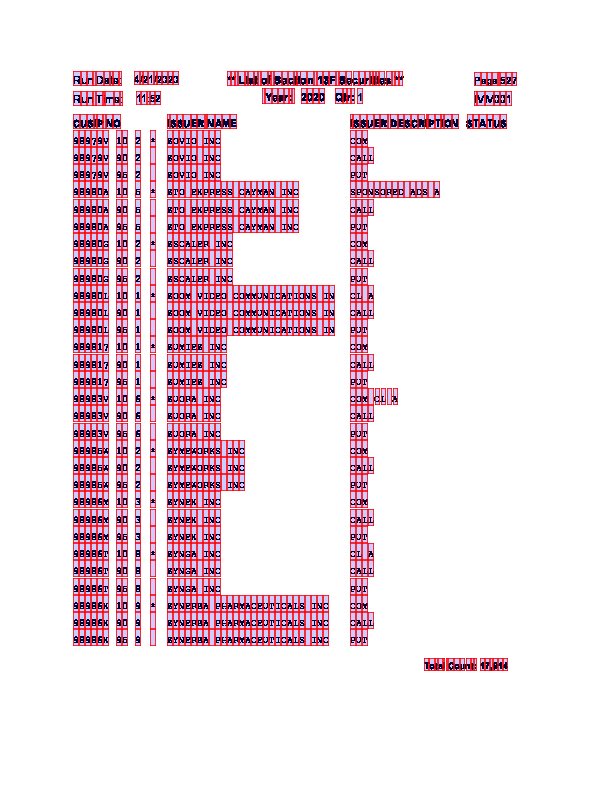

In [155]:
im.reset().draw_rects(first_page.chars)

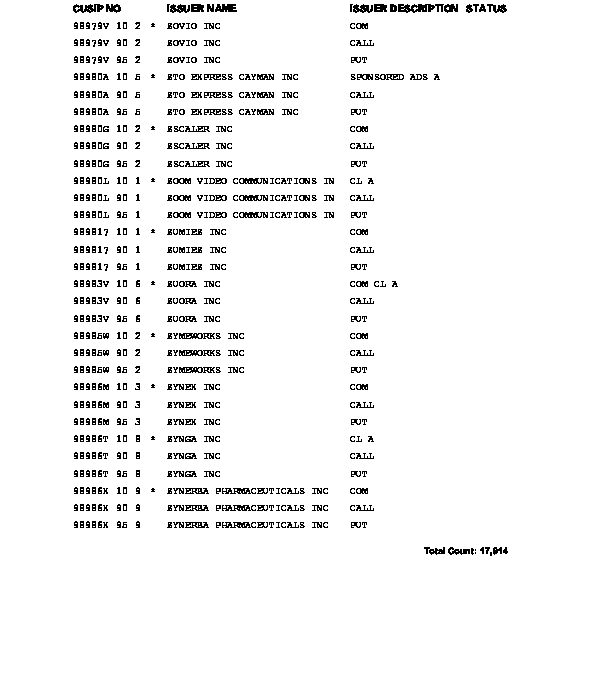

In [159]:
cropped = first_page.within_bbox((0, 115, first_page.width, first_page.height))
im = cropped.to_image()
im

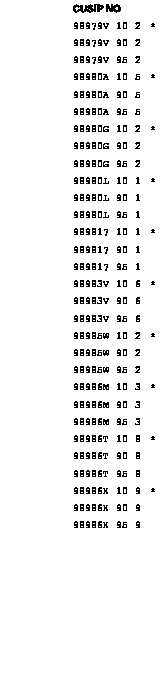

In [160]:
cropped_cusip_no = first_page.within_bbox((0, 115, 160, first_page.height))
im = cropped_cusip_no.to_image()
im

In [161]:
l_cusip = cropped_cusip_no.extract_text().split('\n')
l_cusip.__len__()

30

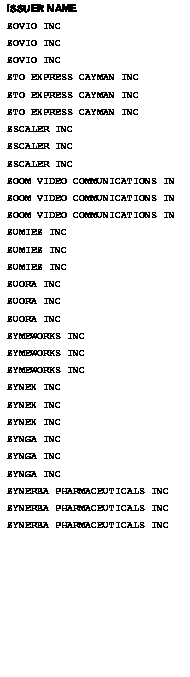

In [162]:
cropped_issuer = first_page.within_bbox((160, 115, 350, first_page.height))
im = cropped_issuer.to_image()
im

In [163]:
l_issuer = cropped_issuer.extract_text().split('\n')
l_issuer.__len__()

30

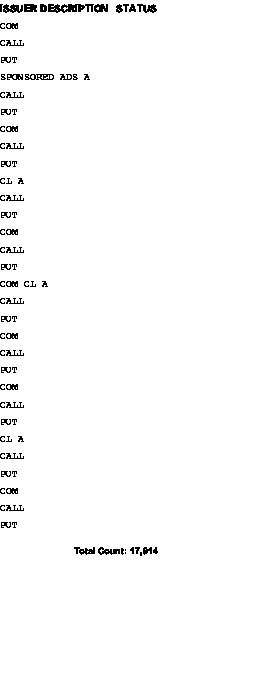

In [164]:
cropped_desc_status = first_page.within_bbox((350, 115, first_page.width, first_page.height))
im = cropped_desc_status.to_image()
im

In [165]:
l_desc_status = cropped_desc_status.extract_text().split('\n')
l_desc_status.__len__()

31

In [168]:
l_status = []
l_desc = []
for t in l_desc_status:
    #print(t)
    if (t.endswith('DELETED')) | (t.endswith('ADDED')):
        print(t)
        status = t.split()[-1]
        print(status)
        desc = ''.join(t.split()[::-1][1:])
        print(desc)
    else:
        status = ''
        desc = t
    
    if not desc.startswith('Total Count:'):
        l_status += [status]
        l_desc += [desc]
    

In [169]:
l_desc

['COM',
 'CALL',
 'PUT',
 'SPONSORED ADS A',
 'CALL',
 'PUT',
 'COM',
 'CALL',
 'PUT',
 'CL A',
 'CALL',
 'PUT',
 'COM',
 'CALL',
 'PUT',
 'COM CL A',
 'CALL',
 'PUT',
 'COM',
 'CALL',
 'PUT',
 'COM',
 'CALL',
 'PUT',
 'CL A',
 'CALL',
 'PUT',
 'COM',
 'CALL',
 'PUT']

In [172]:
l_status

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [177]:
import pandas as pd
pd.DataFrame([l_cusip, l_issuer, l_desc, l_status], 
             index = ['cusip', 'issuer', 'class', 'status']).T

,cusip,issuer,class,status
0,98979V 10 2 *,ZOVIO INC,COM,
1,98979V 90 2,ZOVIO INC,CALL,
2,98979V 95 2,ZOVIO INC,PUT,
3,98980A 10 5 *,ZTO EXPRESS CAYMAN INC,SPONSORED ADS A,
4,98980A 90 5,ZTO EXPRESS CAYMAN INC,CALL,
5,98980A 95 5,ZTO EXPRESS CAYMAN INC,PUT,
6,98980G 10 2 *,ZSCALER INC,COM,
7,98980G 90 2,ZSCALER INC,CALL,
8,98980G 95 2,ZSCALER INC,PUT,
9,98980L 10 1 *,ZOOM VIDEO COMMUNICATIONS IN,CL A,
